In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('JK_F_Data.csv')
df.head()

,Unnamed: 0,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn
0,0,7.9,0.13,0.54,375.3,19.52,267.31,9.65,0.68,7.18,0.28,2.36
1,1,7.6,0.13,0.48,333.6,24.77,297.26,7.00,0.66,8.22,0.36,2.40
2,2,7.5,0.14,0.40,278.0,24.02,276.30,10.25,0.64,8.24,0.34,2.42
3,3,7.3,0.15,0.50,347.5,17.26,223.60,6.75,0.66,7.36,0.26,2.56
4,4,6.9,0.15,0.44,305.8,16.51,269.10,8.23,0.68,7.28,0.30,2.60


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 11 columns):
pH    15150 non-null float64
EC    15150 non-null float64
OC    15150 non-null float64
N     15150 non-null float64
P     15150 non-null float64
K     15150 non-null float64
S     15150 non-null float64
Zn    15150 non-null float64
Fe    15150 non-null float64
Cu    15150 non-null float64
Mn    15150 non-null float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.head()

,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn
0,7.9,0.13,0.54,375.3,19.52,267.31,9.65,0.68,7.18,0.28,2.36
1,7.6,0.13,0.48,333.6,24.77,297.26,7.00,0.66,8.22,0.36,2.40
2,7.5,0.14,0.40,278.0,24.02,276.30,10.25,0.64,8.24,0.34,2.42
3,7.3,0.15,0.50,347.5,17.26,223.60,6.75,0.66,7.36,0.26,2.56
4,6.9,0.15,0.44,305.8,16.51,269.10,8.23,0.68,7.28,0.30,2.60


In [7]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values


In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


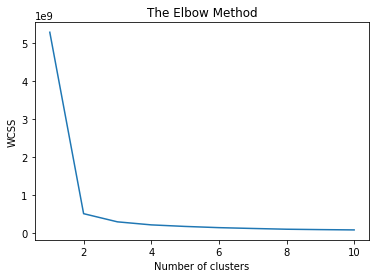

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [24]:
df['Target'] = pd.DataFrame(y_kmeans)



In [25]:
df.head()

,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn,Target
0,7.9,0.13,0.54,375.3,19.52,267.31,9.65,0.68,7.18,0.28,2.36,0
1,7.6,0.13,0.48,333.6,24.77,297.26,7.00,0.66,8.22,0.36,2.40,2
2,7.5,0.14,0.40,278.0,24.02,276.30,10.25,0.64,8.24,0.34,2.42,2
3,7.3,0.15,0.50,347.5,17.26,223.60,6.75,0.66,7.36,0.26,2.56,0
4,6.9,0.15,0.44,305.8,16.51,269.10,8.23,0.68,7.28,0.30,2.60,2
